In [1]:
import numpy as np
import matplotlib.pyplot as plt

# reg = np.load('norm_all_lf.npz', allow_pickle=True)
# reg = np.load('new_all_lf.npz', allow_pickle=True)
# reg = np.load('fixed_lf.npz', allow_pickle=True)
# reg = np.load('fixed_final_lf.npz', allow_pickle=True)
reg = np.load('fits/fixed_final_e_lf.npz', allow_pickle=True)

### Luminosity Function

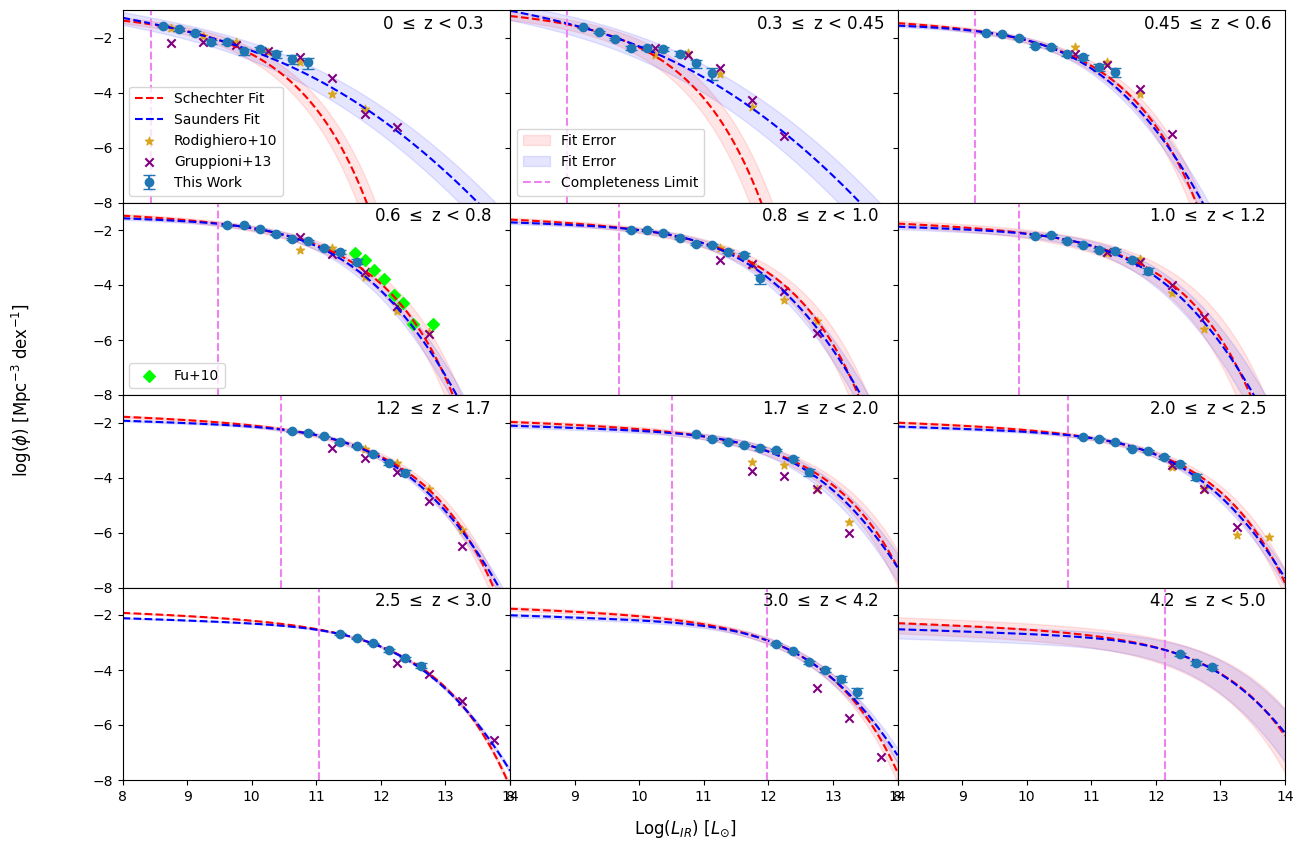

In [2]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * 10 ** (-0.4*(1-1.2)*(L_star-L)) * np.exp(-10.**(-0.4*(L_star-L)))

def saunders_luminosity(L, L_star, phi_star):
    return phi_star * 10 ** (-0.4*(1-1.2)*(L_star-L)) * np.exp(-1 / (2 * 0.2 ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

def local_saunders_luminosity(L, L_star, phi_star):
    return phi_star * 10 ** (-0.4*(1-2)*(L_star-L)) * np.exp(-1 / (2 * 0.4 ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

def plot_lf(redshift_bins, lum_centers, phi, phi_e, min_ls, schech_params, saunder_params, schech_error, saunder_error, axes, label, skipfit=False):
    for i, ((z_start, z_end), lum, p, e, ax, min_l, sch_param, sau_param, sch_e, sau_e) in enumerate(zip(redshift_bins, lum_centers, phi, phi_e, axes, min_ls, schech_params, saunder_params, schech_error, saunder_error)):
        try:
            yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        except TypeError:
            continue
        ax.errorbar(lum, np.log10(p), yerr=yerr, label=label if i == 0 else "", fmt='o', capsize=4)
        
        if not skipfit:
             
            # schechter fit
            if len(sch_param) != 0:
                l = np.linspace(8, 14, 100)
                ax.plot(l, np.log10(schechter_luminosity(l, *sch_param)), label='Schechter Fit' if i == 0 else "", color='red', linestyle='--')
                p_up = sch_param + sch_e
                p_down = sch_param - sch_e
                ax.fill_between(l, 
                    np.log10(schechter_luminosity(l, *p_down)), 
                    np.log10(schechter_luminosity(l, *p_up)), 
                    color='red', alpha=0.1, label='Fit Error' if i == 1 else "")
                
            # normal saunders fit: a=1.2, sigma=0.2
            if i not in (0, 1): 
              if len(sau_param) != 0:
                    l = np.linspace(8, 14, 100)
                    ax.plot(l, np.log10(saunders_luminosity(l, *sau_param)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
                    p_up = sau_param + sau_e
                    p_down = sau_param - sau_e
                    ax.fill_between(l, 
                        np.log10(saunders_luminosity(l, *p_down)), 
                        np.log10(saunders_luminosity(l, *p_up)), 
                        color='blue', alpha=0.1, label='Fit Error' if i == 1 else "")
    
            # local saunders fit: a=2, sigma=0.4
            else:
              if len(sau_param) != 0:
                    l = np.linspace(8, 14, 100)
                    ax.plot(l, np.log10(local_saunders_luminosity(l, *sau_param)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
                    p_up = sau_param + sau_e
                    p_down = sau_param - sau_e
                    ax.fill_between(l, 
                        np.log10(local_saunders_luminosity(l, *p_down)), 
                        np.log10(local_saunders_luminosity(l, *p_up)), 
                        color='blue', alpha=0.1, label='Fit Error' if i == 1 else "")
    
        ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.8)
        ax.axvline(np.log10(min_l), color='violet', linestyle='--', label='Completeness Limit' if i == 1 else "") # , label=f'L < {round(np.log10(min_l), 2)}'
        ax.set_xlim(8, 14)
        ax.set_ylim(-8, -1)
        
# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

plot_lf(reg['z'], reg['x'], reg['y'], reg['e'], reg['m'], reg['schech_p'], reg['saunder_p'], reg['schech_e'], reg['saunder_e'], axes, label='This Work')

for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 0 else '')
    
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 0 else '')
    
# Fu 0.6 < z < 0.8
axes[3].scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[3].legend(loc='lower left')
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('bolo_lf.png')
plt.show()
